In [1]:
#!/user/bin/env python
# -*- coding:utf-8 -*-
# author: Wei Li
# creat: 2022-3-29
# modify: 2022-3-29
# function: Implement the least square method and gradient descent method 
# for solving the linear regression problem


import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import cholesky

from utls import Generate_Samples,f 

In [2]:
# the parameter setting for generating 10 samples 
N  = 10
X_range = (-5,5)
mu = 0
sigma = 0.2

# generate N samples with the functions above
samples = Generate_Samples(N,X_range,mu,sigma,f)
samples = sorted(samples,key=lambda samples:samples[1])

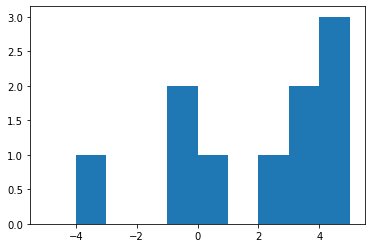

In [3]:
# Plot the uniform distribution of 'x_i's
plt.hist([s[0] for s in samples],[x for x in range(-5,6)])
plt.show()

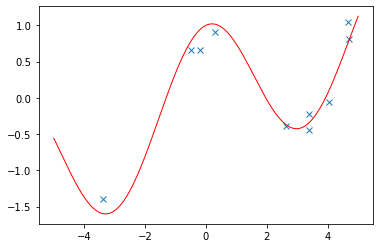

In [4]:
# plot sample dispersion and the curve of y_i = f(x_i)
plt.plot([s[0] for s in samples],[s[1] for s in samples],'x')
x = np.linspace(-5,5,1000)
plt.plot(x,f(x),color='red',linewidth=1)
plt.show()

In [5]:
# display the generated samples
for s in samples:
    print("x_i = %.2f, y_i = %.2f"%(s[0],s[1]))

x_i = -3.38, y_i = -1.40
x_i = 3.37, y_i = -0.45
x_i = 2.63, y_i = -0.40
x_i = 3.38, y_i = -0.22
x_i = 4.03, y_i = -0.05
x_i = -0.20, y_i = 0.66
x_i = -0.50, y_i = 0.66
x_i = 4.71, y_i = 0.81
x_i = 0.31, y_i = 0.90
x_i = 4.67, y_i = 1.04
